<a href="https://colab.research.google.com/github/krithikaceg/functional_intro_to_python/blob/master/python_machine_learning_book_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10 Regression Reading

## EDA

### Question 1

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
             'python-machine-learning-book-2nd-edition'
             '/master/code/ch10/housing.data.txt',
             sep='\s+')

In [0]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
               'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [0]:
len(df.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [0]:
len(df.columns)

14

## Regression


### Question 2

In [0]:
 import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = df[['RM']].values
y = df['MEDV'].values
slr = LinearRegression()
slr.fit(X, y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
def lin_regplot(X, y, model):
     plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
     plt.plot(X, model.predict(X), color='black', lw=2)
     return None

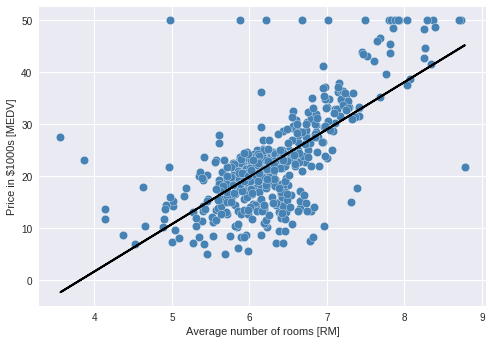

In [0]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Question 3

In [0]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

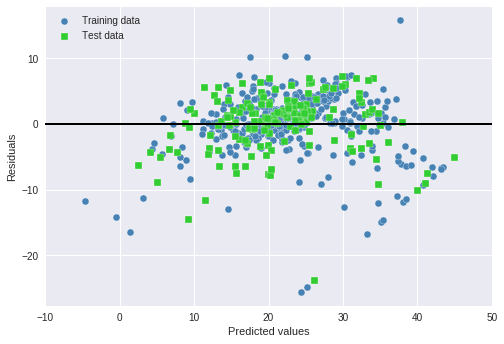

In [0]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
             c='steelblue', marker='o', edgecolor='white',
             label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
             c='limegreen', marker='s', edgecolor='white',
             label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
     mean_squared_error(y_train, y_train_pred),
     mean_squared_error(y_test, y_test_pred)))

MSE train: 22.390, test: 21.382


## Random Forest Regression

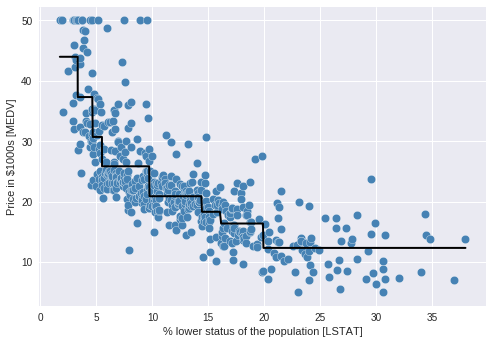

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [0]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.4, 
                        random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.393, test: 12.743
R^2 train: 0.984, test: 0.846
